In [1]:
from gensim.models import KeyedVectors
import os
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import glob
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir('D:/Rampen/models/sliding')

In [3]:
l = sorted(glob.glob('*.w2v'))

In [7]:
l[0][-13:-9]

'1750'

In [25]:
d = []

for m in l:
    mo = KeyedVectors.load(m)
    if "rampen" in mo.wv.vocab and "staatkunde" in mo.wv.vocab:
        print(m)
        d.append([m[-13:-9],mo.wv.similarity('rampen','staatkunde')])
        #print(", ".join([k for k,v in dict(mo.most_similar('ramp',topn=8)).items()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


sliding-model-1750-1765.w2v
sliding-model-1751-1766.w2v
sliding-model-1752-1767.w2v
sliding-model-1753-1768.w2v
sliding-model-1754-1769.w2v
sliding-model-1755-1770.w2v
sliding-model-1756-1771.w2v
sliding-model-1757-1772.w2v
sliding-model-1758-1773.w2v
sliding-model-1759-1774.w2v
sliding-model-1760-1775.w2v
sliding-model-1761-1776.w2v
sliding-model-1762-1777.w2v
sliding-model-1763-1778.w2v
sliding-model-1764-1779.w2v
sliding-model-1765-1780.w2v
sliding-model-1766-1781.w2v
sliding-model-1767-1782.w2v
sliding-model-1768-1783.w2v
sliding-model-1769-1784.w2v
sliding-model-1770-1785.w2v
sliding-model-1771-1786.w2v
sliding-model-1772-1787.w2v
sliding-model-1773-1788.w2v
sliding-model-1774-1789.w2v
sliding-model-1775-1790.w2v
sliding-model-1776-1791.w2v
sliding-model-1777-1792.w2v
sliding-model-1778-1793.w2v
sliding-model-1779-1794.w2v
sliding-model-1780-1795.w2v
sliding-model-1781-1796.w2v
sliding-model-1782-1797.w2v
sliding-model-1783-1798.w2v
sliding-model-1784-1799.w2v
sliding-model-1785-1

<IPython.core.display.Javascript object>


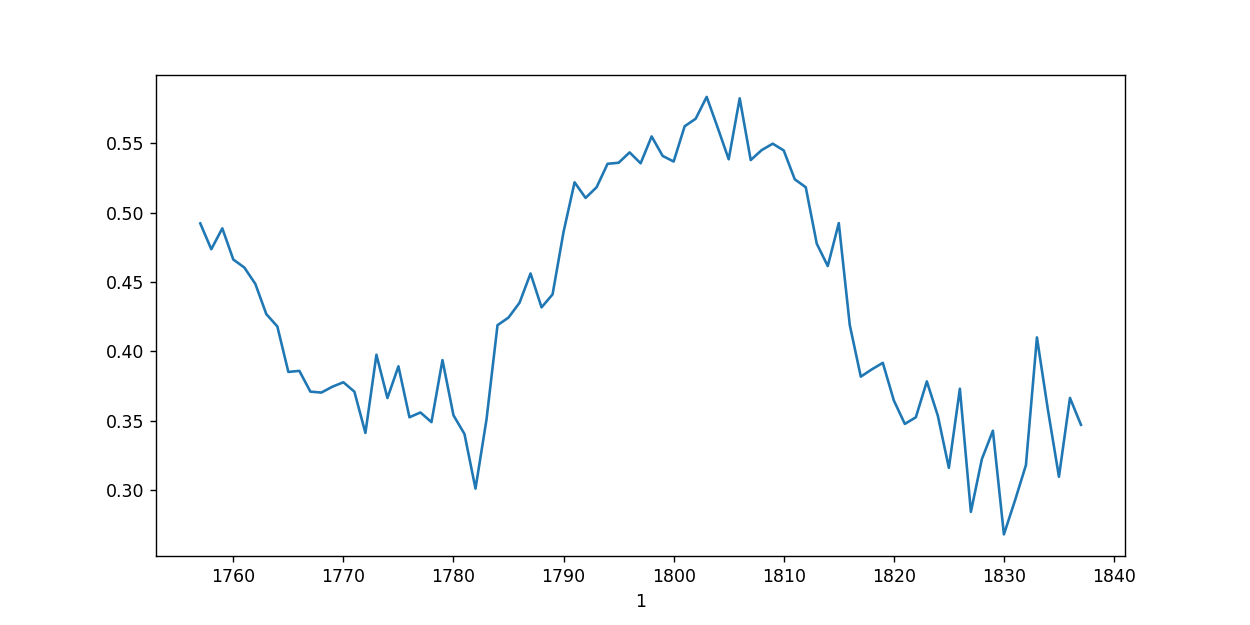

In [26]:
d = pd.DataFrame(d,columns=['1','2'])
d['1'] = d['1'].astype(int) + 7
d.plot(x='1',y='2',figsize=(10,5),legend=False)

In [46]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word,100)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(10, 10), dpi=80)

    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


<IPython.core.display.Javascript object>


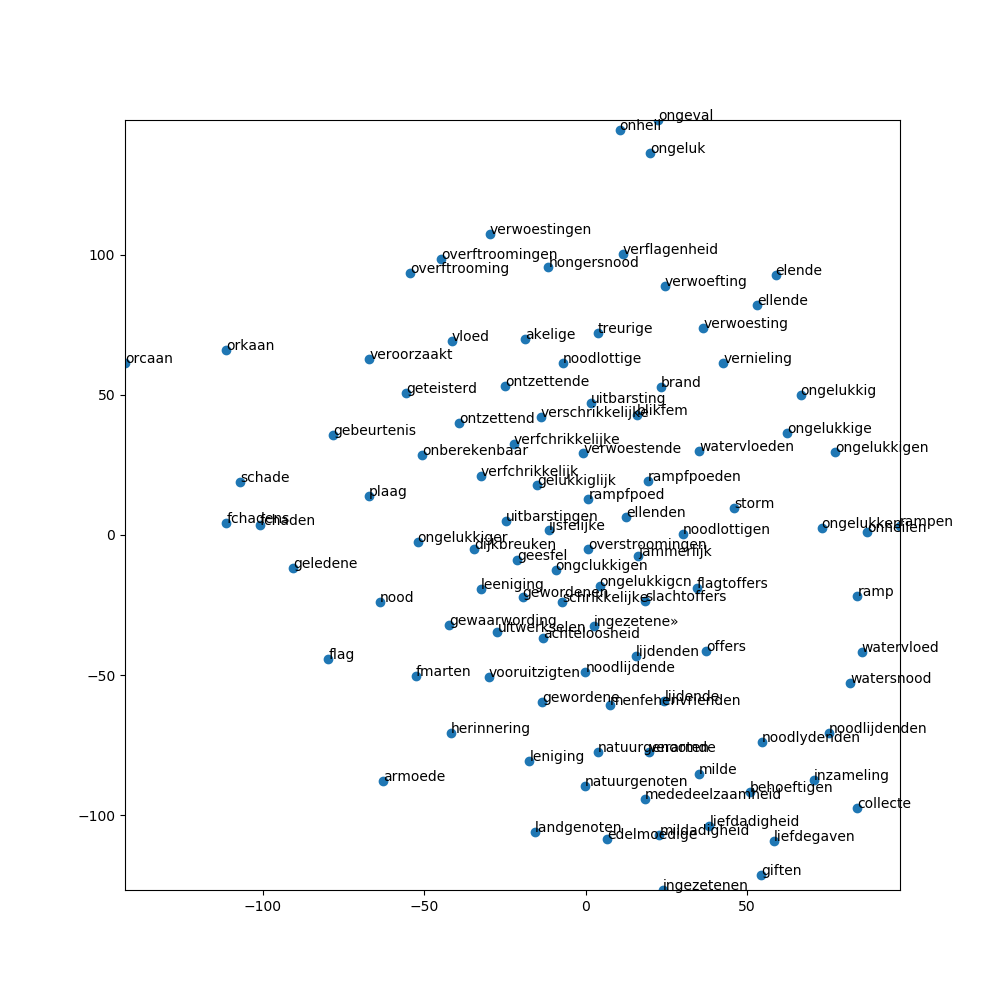

In [47]:
display_closestwords_tsnescatterplot(m, 'ramp')


In [7]:
def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.wv.vocab)]
    
    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

In [28]:
d = DistanceMatrix([k for k,v in dict(m.most_similar('ramp',topn=100)).items()], m)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [30]:
d = d.as_matrix()
affprop = AffinityPropagation(affinity='euclidean', damping=0.5)
af = affprop.fit(d)

Estimated number of clusters: 15


<IPython.core.display.Javascript object>


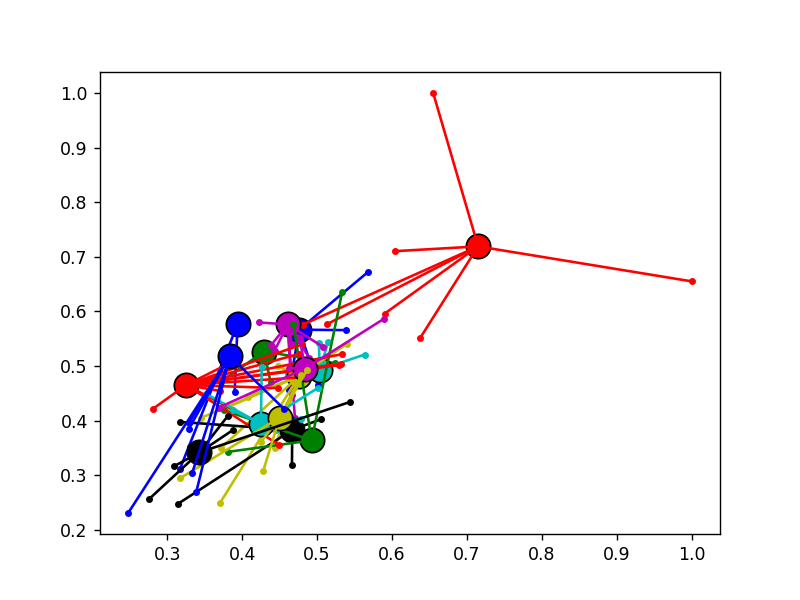

In [31]:
from itertools import cycle

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

no_clusters = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = d[cluster_centers_indices[k]]
    plt.plot(d[class_members, 0], d[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in d[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [23]:
d

array([[1.        , 0.65489805, 0.47613871, ..., 0.16423857, 0.16281642,
        0.31857994],
       [0.65489805, 1.00000012, 0.56642675, ..., 0.14751256, 0.12305242,
        0.34423128],
       [0.47613871, 0.56642675, 1.        , ..., 0.41886115, 0.27874526,
        0.45691124],
       ...,
       [0.16423857, 0.14751256, 0.41886115, ..., 1.        , 0.42138925,
        0.30011693],
       [0.16281642, 0.12305242, 0.27874526, ..., 0.42138925, 1.        ,
        0.25446895],
       [0.31857994, 0.34423128, 0.45691124, ..., 0.30011693, 0.25446895,
        1.        ]])

In [62]:
def GetNetwork(model, word):
    
    dft = pd.DataFrame()
    
    for wl1 in list(dict(model.most_similar(word, topn=5)).keys()):

        for wl2 in list(dict(model.most_similar(wl1, topn=5)).keys()):
            
            for wl3 in list(dict(model.most_similar(wl2, topn=5)).keys()):
                
                for wl4 in list(dict(model.most_similar(wl3, topn=5)).keys()):
                    source = wl3
                    target = wl4
                    t = pd.DataFrame([source, target]).T
                    dft = dft.append(t)
    
    dft.columns = ['source', 'target']
    dft['count'] = [model.wv.vocab[w].count for w in list(dft.target)]
    
    return dft

In [69]:
df = pd.DataFrame()

for li in l:
    m = KeyedVectors.load(li)
    d = GetNetwork(m,'ramp')
    d = d[d['count'] > 5]
    d['year'] = li[6:10]
    df = df.append(d)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [70]:
df.to_csv('network-ramp.csv',index=False)

In [15]:
os.chdir('D:/Scriptie/Data/models')

In [17]:
glob.glob('*bigrams*.w2v')

['1815_10yp_bigrams_model.w2v',
 '1825_10yp_bigrams_model.w2v',
 '1835_10yp_bigrams_model.w2v',
 '1845_10yp_bigrams_model.w2v',
 '1855_10yp_bigrams_model.w2v',
 '1865_10yp_bigrams_model.w2v',
 '1875_10yp_bigrams_model.w2v',
 '1885_10yp_bigrams_model.w2v',
 '1895_10yp_bigrams_model.w2v',
 '1905_10yp_bigrams_model.w2v']

In [24]:
m = KeyedVectors.load('1905_10yp_bigrams_model.w2v')

In [25]:
m.most_similar('nationale_ramp')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('politieke_fout', 0.7806560397148132),
 ('grove_fout', 0.7772705554962158),
 ('hersenschim', 0.7625821828842163),
 ('ware_ramp', 0.7516458630561829),
 ('grove_dwaling', 0.7420403957366943),
 ('onoverkomelijke_hinderpaal', 0.7360822558403015),
 ('nuttige_zaak', 0.7308781147003174),
 ('gebeurlijkheid', 0.7291666269302368),
 ('andere_omstandigheid', 0.7267868518829346),
 ('der_hoofdoorzaken', 0.7262939214706421)]